# Practical session 2 - Practise with classic libraries

Students (pair):
- [Matthieu Paolo]((https://github.com/matthieuPaolo/python_sdia/tree/main/Labs/Lab1))
- [Luc Thiebaud]((https://github.com/LucThiebaud))

```
conda create --name=lab2 --file=requirement.txt
conda activate lab2
# do not forget to deactivate the environment if needed
# you can remove the environment once you are done
conda env remove --name=lab2
```

**Useful references for this lab**:

[1] `numpy`: [lecture notes (1.4.1-1.4.2)](https://scipy-lectures.org/intro/numpy/index.html) and [documentation](https://numpy.org/doc/stable/)

[2] `pandas`: [documentation](https://pandas.pydata.org/docs/getting_started/index.html), [quick tutorial](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html)

[3] `matplotlib`: [lecture notes (1.5)](https://scipy-lectures.org/intro/matplotlib/index.html) and [documentation](https://matplotlib.org/)

[4] `h5py`: [quick start guide](http://docs.h5py.org/en/stable/quick.html#quick)

## <a name="content">Contents</a>
- [Exercise 1: Computing basic statistics](#ex1)
- [Exercise 2: Random variables and histograms](#ex2)
- [Exercise 3: Discrete isotropic total variation](#ex3)
---

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import scipy.stats as stats

---
## <a name="ex1">Exercise 1: Random variables and histograms</a>

In this exercise, we are interested in generating samples from the Gamma distribution $\mathcal{G}(\alpha,\beta)$, of probability density function (pdf)

\begin{equation}
    p(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x) \mathbb{1}_{\mathbb{R}_+^*}(x),
\end{equation}

and displaying their histogram. In the following, we consider $(\alpha, \beta) = (9, 2)$.

1\. Set the random seed to a fixed value for reproducibility, and biefly check your instruction works as intended.
> Hint: you may take a look at the following pages: [random module](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random), [random generator](https://numpy.org/doc/stable/reference/random/generator.html).

**Answer**:

In [3]:
# your code

#définir la seed
import random
random.seed(59)


#Test : on reset la seed avant d'appeler random, on a toujours le même résultat en premier
print(random.random())
print(random.random())

random.seed(59)
print(random.random())

random.seed(59)
print(random.random())

0.22418547484732643
0.9326402965973477
0.22418547484732643
0.22418547484732643


2\. Generate $\approx 10^5$ samples in a vector. Save the vector in a file, `samples.hdf5` or `samples.npy`.
> Warning / hint: 
> - take a careful look at the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html?highlight=gamma#numpy.random.gamma) (multiple conventions exist for the definition of the pdf underlying the distribution...);
> - to save data in a `npy` file, take a look at the example reported in the [Numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.save.html);
> - to save data in a `.h5` file, take a quick look at the [documentation here](https://docs.h5py.org/en/stable/quick.html#quick).

**Answer**:

In [4]:
# your code

# Generate 10**5 samples from gamma distribution (9,2)
samples = np.random.gamma(9, 1/2, 10**5)

# Save the samples to a file in HDF5 format
np.save("samples.hdf5", samples)

# Save the samples to a file in NumPy format
np.save("samples.npy", samples)

#test
print(len(samples))

100000


3\. Estimate an histogram of this distribution for a well chosen set of bins, and display it.
> Warnings: 
> - make sure the [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) corresponds to a probability density function (pdf);
> - do not forget to include a proper title with names for the axes.

**Answer**:

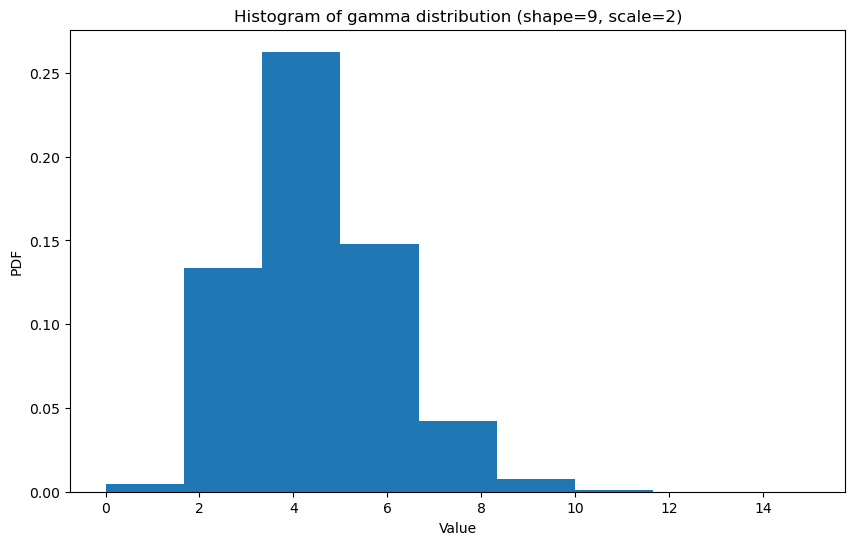

In [5]:
# your code
import matplotlib.pyplot as plt

# Choose a well-chosen set of bins
binsnb=10
bins = np.linspace(0, 15, binsnb)



# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(samples, bins, density=True, label='Histogram')
plt.xlabel("Value")
plt.ylabel("PDF")
plt.title("Histogram of gamma distribution (shape=9, scale=2)")

plt.show()

4\. Overlay the probability density function on the histogram and compare these in a few words. Save the resulting picture in `.png` format.
> Hint: 
> - take a look at the `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to avoid implementing the pdf from scratch;
> - return the bins in which the histogram is computed, and evaluate the pdf on those points.

**Answer**:

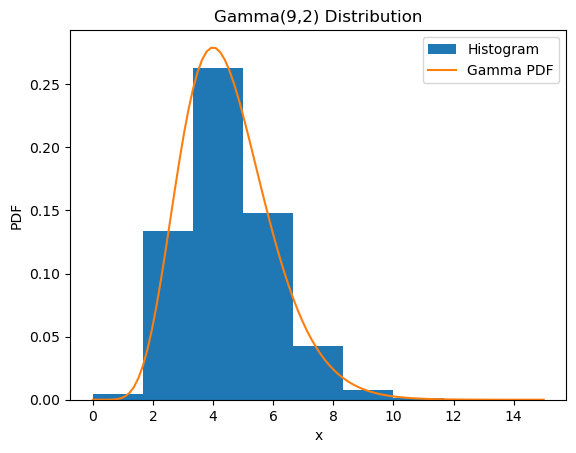

In [6]:
# your code

binsgamma=np.linspace(0, 15, 100)
y = stats.gamma.pdf(binsgamma, a=9, scale=1/2)

#calculate pdf of Gamma distribution for each x-value
y = stats.gamma.pdf(binsgamma, a=9, scale=1/2)


plt.hist(samples, bins, density=True, label='Histogram')
plt.xlabel("Value")
plt.ylabel("PDF")
plt.plot(binsgamma, y,label="Gamma PDF")
plt.xlabel("x")
plt.ylabel("PDF")
plt.title("Gamma(9,2) Distribution")
plt.legend()

#display plot
plt.show()

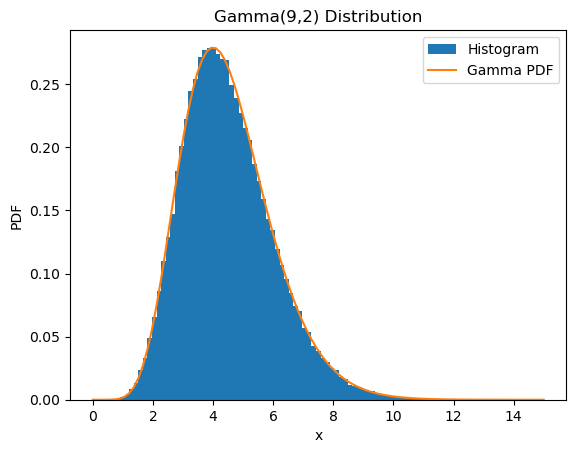

In [7]:
binsnb=100
bins = np.linspace(0, 15, binsnb)
binsgamma=np.linspace(0, 15, 100)
y = stats.gamma.pdf(binsgamma, a=9, scale=1/2)


plt.hist(samples, bins, density=True, label='Histogram')
plt.xlabel("Value")
plt.ylabel("PDF")
plt.plot(binsgamma, y,label="Gamma PDF")
plt.xlabel("x")
plt.ylabel("PDF")
plt.title("Gamma(9,2) Distribution")
plt.legend()
plt.savefig('histogram.png')

#display plot
plt.show()

In [8]:
"""
We remark that the quality of the estimation with the histogram is logically better with more bars

"""

'\nWe remark that the quality of the estimation with the histogram is logically better with more bars\n\n'

---
## <a name="ex2">Exercise 2: Basic statistics with `pandas`</a>

In this second exercise, we focus on computing basic statistics, and applying linear regression to a small data set. These data are gathered in the following table, which gives the infant mortality (`X`) and the gross national product per inhabitant (`Y`) of 12 european countries :

| `X` | 190 | 128 | 180 | 212 | 56 | 192 | 68 | 98 | 110 | 197 | 181 | 233 |
|-----|-----|-----|-----|----|-----|----|----|-----|-----|-----|-----|-----|
| `Y` |  24 |  28 |  24 | 19 |  37 | 22 | 34 |  25 |  36 |  24 |  20 |  18 |

1\. For `X `and `Y`, compute the median, mean, variance and standard deviation. The data points have already been entered into a `.csv` file stored in `data/data.csv`.
> Hint: 
> - you can directly use `pandas` to load the data into a `DataFrame` ([`pd.read_csv`](https://pandas.pydata.org/docs/reference/frame.html));
> - take a look at the built-in operations available for `DataFrame` objects ([documentation](https://pandas.pydata.org/docs/reference/frame.html));
> - to display a `DataFrame` `f`:
> ```python 
> from IPython.display import display
> display(df)
> ```
> - sort the `DataFrame` with respect to the value of `X` (see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)) This will be useful for question 3.

**Answer**:

In [9]:
# your code

# lecture du fichier csv et création d'un DataFrame df contenant les informations du fichier csv
df = pd.read_csv("C:/Users/lucth/OneDrive/Documents/SDI/Python/Lab_2/data.csv")

# For X and Y, compute the median, mean, variance and standard deviation
X_mean = df["X"].mean()
X_median = df["X"].median()
X_var = df["X"].var()
X_std = df["X"].std()

Y_mean = df["Y"].mean()
Y_median = df["Y"].median()
Y_var = df["Y"].var()
Y_std = df["Y"].std()

# sort the DataFrame with respect to the value of X
df = df.sort_values(by='X', ascending=True)

2\. Give the equation of the regression line of `Y` as a function of `X`.
> Hint: 
> - take a look at the functionalities available in `numpy` (e.g., `np.polyfit` and `np.polyval`);
> - if needed, note that you can retrieve the data from the resulting `pandas` `DataFrame` with the `to_numpy()` method.

**Answer**:

In [10]:
# your code

# création des vecteurs X et Y (en array)
X = df["X"].to_numpy()
Y = df["Y"].to_numpy()

# détermination des variables a et b tels que Y = a * X + b
a, b = np.polyfit(X, Y, 1)

print("Y =", a, "* X +", b)

Y = -0.09816474883463176 * X + 41.00949679999129


3\. Display the cloud of points and the regression line $Y = f(X)$ on the same figure. Save the figure in `.png` format.

**Answer**:

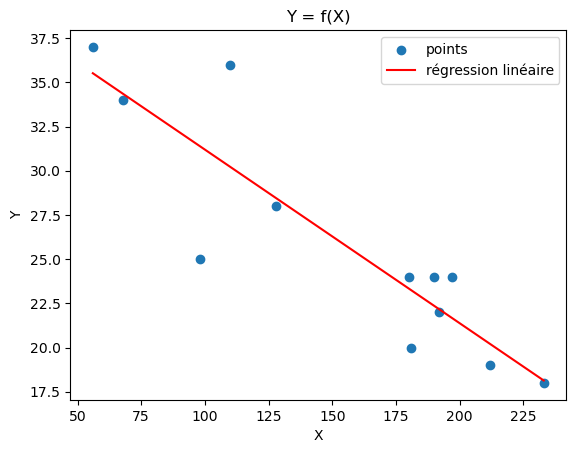

In [11]:
# your code

# création du plan 
plt.scatter(X,Y)

# j'écris le titre et nomme les axes
plt.title('Y = f(X)')
plt.xlabel('X')
plt.ylabel('Y')

# je plot la droite avec les a et b trouvés précedemment
plt.plot(X, a * X + b, c='r', )
plt.legend(["points", "régression linéaire"])


plt.savefig('reg_lin.png')
plt.show()

---
## <a name="ex3">Exercise 3: Discrete isotropic total variation</a>

This exercise is devoted to the computation of the discrete isotropic total variation (TV) of an input matrix $\mathbf{X} = [\mathbf{x}_n]_{1 \leq n \leq N} \in\mathbb{C}^{M \times N}$, which is particularly useful in Bayesian inference (e.g., for inverse problems) to promote piece-wise smooth solutions. The TV is defined as

\begin{equation*}
    \text{TV}(\mathbf{X}) = \Vert D(\mathbf{X}) \Vert_{1,2} = \sum_{m=1}^M \sum_{n=1}^N \sqrt{[\mathbf{XD}_h]^2_{m,n} + [\mathbf{D}_v\mathbf{X}]^2_{m,n}},
\end{equation*}

where $[\mathbf{Z}]_{m,n}$ denotes the elements in position $(m,n)$ of the matrix $\mathbf{Z}$,

\begin{align*}
    D(X) &= (\mathbf{XD}_h, \mathbf{D}_v\mathbf{X}) \in \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \\
    %
    \mathbf{XD}_h &= [\mathbf{x}_2-\mathbf{x}_1, \dotsc, \mathbf{x}_N-\mathbf{x}_{N-1}, \mathbf{0}_M] \in \mathbb{C}^{M\times N} \\
    %
    \mathbf{D}_v\mathbf{X} &= [\tilde{\mathbf{x}}_2^T-\tilde{\mathbf{x}}^T_1, \dotsc, \tilde{\mathbf{x}}^T_M-\tilde{\mathbf{x}}^T_{M-1}, \mathbf{0}_N]^T \in \mathbb{C}^{M\times N},
\end{align*}

$\mathbf{x}_n \in \mathbb{C}^{M}$ is the $n$-th column of $\mathbf{X}$, and $\tilde{\mathbf{x}}_m \in \mathbb{C}^{1\times N}$ is the $m$-th row of $\mathbf{X}$. 
The linear operator $D: \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} $ is the discrete gradient operator. The adjoint of $D$, $D^*: \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N}$, is given by

\begin{align*}
    (\forall \mathbf{Y} = (\mathbf{Y}_h,\mathbf{Y}_v)), \quad D^*(\mathbf{Y}) &= \mathbf{Y}_h\mathbf{D}^*_h + \mathbf{D}^*_v\mathbf{Y}_v \\
    %
    \mathbf{Y}_h\mathbf{D}^*_h &= \big[-\mathbf{y}_{h,1},- [\mathbf{y}_{h,n}-\mathbf{y}_{h,n-1}]_{2 \leq n \leq N-1}, \mathbf{y}_{h, N-1} \big] \\
    %
    \mathbf{D}^*_v\mathbf{Y}_v &= \big[-\tilde{\mathbf{y}}_{v,1}^T,- [\tilde{\mathbf{y}}_{v,m}^T-\tilde{\mathbf{y}}^T_{v,m-1}]_{2 \leq m \leq M-1}, \tilde{\mathbf{y}}^T_{v, M-1} \big]^T
\end{align*}

where $\mathbf{y}_{h,n}$ is the $n$-th column of $\mathbf{Y}_h$, and $\tilde{\mathbf{x}}_{v,m}$ is the $m$-th row of $\mathbf{Y}_v$.

1\. Using `numpy`, implement a function `gradient2D` to compute the 2D discrete gradient operator $D$ applied to a matrix $\mathbf{X}\in\mathbb{C}^{M \times N}$ (no for loops!). Trigger an error message whenever the input array has more than 2 dimensions. If not clear from the implementation, add a few short comments to explain your code.

> Hint: 
> - to trigger an error, you can for instance use an `assert` statement, or raise an [exception (e.g., `AssertionError`)](https://docs.python.org/3/library/exceptions.html);
> - only a few operations are needed: computing vertical differences, horizontal differences, and possibly a concatenation of matrices into a single tensor (= n-dimensional array);
> - possibly useful functions: `np.diff`, `np.c_`, `np.r_` (or `np.concatenate`). 

**Answer**:

In [12]:
# your code

def gradient2D(X) : 
    
    r""" 
    
    Arguments : une matrice X complexe de taille M, N
    
    Return : retourne un tuple D(X) = (XDh, DvX) un tuple de deux matrices complexes de taille M, N tel que défini ci-dessus"""
    
    # insérer un message d'erreur si le array en input a plus de 2 dimensions
    if X.ndim != 2 :
        raise AssertionError("L'argument doit être de dimension 2")
    
    
    # calcul de XDh (j'utilise np.diff et je rajoute une colonne de 0)
    XDh = np.diff(X, axis = 1)
    XDh = np.concatenate((XDh, np.zeros((X.shape[0], 1))), axis=1)
    
    # calcul de DvX (j'utilise np.diff et je rajoute une ligne de 0)
    DvX = np.diff(X, axis = 0) 
    DvX = np.concatenate((DvX, np.zeros((1, X.shape[1]))), axis=0)
    
    D_X = (XDh, DvX)
    
    return D_X

In [13]:
mat1 = np.full((2, 2), 1)
XDh = gradient2D(mat1)[0]
DvX = gradient2D(mat1)[1]
mat1.shape != DvX.shape

False

2\. Implement a unit-test to validate the behaviour of the `gradient2D` function. For instance, you can check the format of the output, and test the result when the function is evaluated on a constant matrix (for both a square and a non-square input matrix). Run the unit-test from the present Jupyter notebook.

**Answer**:

In [14]:
# your code
def test_gradient2D() :
    #test pour une matrice carrée constante
    mat1 = np.full((2, 2), 1)
    XDh = gradient2D(mat1)[0]
    DvX = gradient2D(mat1)[1]
    if mat1.shape != XDh.shape :
        raise AssertionError("pour une matrice carrée, XDh n'est pas de même dimension que la matrice de départ")
    elif mat1.shape != DvX.shape :
        raise AssertionError("pour une matrice carrée, DvX n'est pas de même dimension que la matrice de départ")
    elif XDh.any() != 0 :
        raise AssertionError("pour une matrice carrée constante, XDh n'est pas la matrice nulle")
    elif DvX.any() != 0 :
        raise AssertionError("pour une matrice carrée constante, DvX n'est pas la matrice nulle")
      
    #test pour une matrice non carrée constante
    mat2 = np.full((5, 6), 9)
    XDh = gradient2D(mat2)[0]
    DvX = gradient2D(mat2)[1]
    if mat2.shape != XDh.shape :
        raise AssertionError("pour une matrice non carrée, XDh n'est pas de même dimension que la matrice de départ")
    elif mat2.shape != DvX.shape :
        raise AssertionError("pour une matrice non carrée, DvX n'est pas de même dimension que la matrice de départ")
    elif XDh.any() != 0 :
        raise AssertionError("pour une matrice non carrée constante, XDh n'est pas la matrice nulle")
    elif DvX.any() != 0 :
        raise AssertionError("pour une matrice non carrée constante, DvX n'est pas la matrice nulle")
        
    return


In [15]:
# on appelle le test unitaire, si il n'y a pas d'AssertionError, le test est passé

test_gradient2D()

3\. Document the function `gradient2D` with an appropriate docstring (see Lab 1).

**Answer**:

In [16]:
# your code

r""" 
    
    Arguments : une matrice X complexe de taille M, N
    
    Return : retourne un tuple D(X) = (XDh, DvX) un tuple de deux matrices complexes de taille M, N tel que défini ci-dessus"""

' \n    \n    Arguments : une matrice X complexe de taille M, N\n    \n    Return : retourne un tuple D(X) = (XDh, DvX) un tuple de deux matrices complexes de taille M, N tel que défini ci-dessus'

4\. Using 1., define a function `tv` to compute $\text{TV}(\mathbf{X})$, $\mathbf{X}\in\mathbb{C}^{M \times N}$. Write a unit-test and document your function.

**Answer**:

In [17]:
# your code
def tv(X) : 
    r"""
    Arguments : une matrice X complexe de taille M, N
    
    Return : retourne un scalair TV(X) tel que défini ci-dessus"""
    
    # calcul de XDh et DvX en utilisant gradient2D(X)
    XDh = gradient2D(X)[0]
    DvX = gradient2D(X)[1]
    
    #initialisation de TV_X
    TV_X = 0
    
    #boucle pour parcourir toutes les lignes de XDh et DvX
    for i in range(X.shape[0]) :
        #boucle pour parcourir toutes les colonnes de XDh et DvX
        for j in range(X.shape[1]) :
            #ajout de (XDh_ij)**2 et (DvX_ij)**2 à TV
            TV_X += XDh[i][j]**2 + DvX[i][j]**2
    return TV_X

5\. Implement a function `gradient2D_adjoint` to compute $D^*(\mathbf{Y})$, the adjoint of the 2D discrete gradient operator $D$ applied to $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$. Add a few short comments to explain your code whenever appropriate.

**Answer**:

In [18]:
# your code

def gradient2D_adjoint(Y) : 
    
    r"""
    Arguments : un tuple de deux matrices complexes de taille M, N
    
    Return : une matrice complexe D* de taille M, N tel que défini ci-dessus
    
    """ 
    # definition de Yh, Yv
    Yh, Yv = Y[0], Y[1]
    
    # calcul de YhDh
    # je fonctionne par étape
    # étape 1 : calcul des colonnes 2 à N-1, je remarque que ces colonnes sont de la forme de - (y_i - y_i-1)
    YhDh1 = - np.diff(Yh, axis = 1)
    # je retire la dernière colonne puisque la dernière colonne de YhDh ne respecte pas cette forme, on a après cette étape les colonnes 2 à N-1 de YhDh
    YhDh2 = np.delete(YhDh1, YhDh1.shape[1] - 1, axis=1)
    
    # étape 2 : ajout de la colonne N-1
    # je crée un array de dimension M,1 contenant la colonne N-1 de Y
    colonne = np.array([Yh[:, Yh.shape[1] - 2]]).T
    #je l'ajoute à la matrice précédente
    YhDh3 = np.concatenate((YhDh2, colonne), axis=1)
    
    # étape 3
    # je crée un array de dimension M, 1 contenant l'opposé de la colonne 1 de Y
    colonne = - np.array([Yh[:, 0]]).T
    #je l'ajoute à la matrice précédente
    YhDh = np.concatenate((colonne, YhDh3), axis=1)
    
    
    # calcul de DvYv
    # je fonctionne par étape
    # étape 1 : calcul des lignes 2 à M-1, je remarque que ces colonnes sont de la forme de - (y_i - y_i-1) où les y_i sont ici les lignes de la matrice
    DvYv1 = - np.diff(Yv, axis = 0) 
    # je retire la dernière ligne puisque la dernière colonne de DvYv ne respecte pas cette forme, on a après cette étape les lignes 2 à M-1 de DvYv
    DvYv2 = np.delete(DvYv1, DvYv1.shape[0] - 1, axis=0)

    #étape 2 : ajout de la ligne M-1
    # je crée un array de dimension 1, N contenant la ligne M-1 de Y
    ligne = np.array([Yv[Yv.shape[0] - 2, :]])
    #je l'ajoute à la matrice précédente
    DvYv3 = np.concatenate((DvYv2, ligne), axis=0)

    # étape 3
    # je crée un array de dimension 1, N contenant l'opposé de la ligne 1 de Y
    ligne = - np.array([Yv[0, :]])
    #je l'ajoute à la matrice précédente
    DvYv = np.concatenate((ligne, DvYv3), axis=0)
    
    
    # calcul de D
    D = YhDh + DvYv
    
    return D

In [19]:

np.random.seed(59)
X = np.random.randint(-10, 10, size=(8, 4)) + 1j * np.random.randint(-10, 10, size=(8, 4))
Y = (np.random.randint(-10, 10, size=(8, 4)) + 1j * np.random.randint(-10, 10, size=(8, 4)), np.random.randint(-10, 10, size=(8, 4)) + 1j * np.random.randint(-10, 10, size=(8, 4)))
D_X = gradient2D(X)
D_Y = gradient2D_adjoint(Y)

a = np.trace(np.dot(X.T, D_Y))
a

b = np.trace(np.dot(D_X[0].T, Y[0])) + np.trace(np.dot(D_X[1].T, Y[1]))
a == b

True

6\. Implement a unit-test to validate `gradient2D_adjoint`, e.g., by checking the size of the output from the function and verifying that `gradient2D_adjoint` is adjoint to `gradient2D`, i.e., for any $\mathbf{X}\in\mathbb{C}^{M \times N}$ and $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$:

\begin{equation}
    \forall \mathbf{X} \in \mathbb{C}^{M \times N}, \mathbf{Y} = (\mathbf{Y}_h, \mathbf{Y}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \;
    %
    \langle D(\mathbf{X}), \mathbf{Y} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{X}, D^*(\mathbf{Y}) \rangle_{\mathbb{C}^{M \times N}}, 
\end{equation}

where 

\begin{align}
    &\forall \mathbf{U}, \mathbf{V} \in \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N}} = \text{Tr}(\mathbf{U}^T \mathbf{V}) = \sum_{m=1}^M \sum_{n=1}^N u_{m,n}^* v_{m,n}, \\
    &\forall \mathbf{U} = (\mathbf{U}_h, \mathbf{U}_v), \mathbf{V} = (\mathbf{V}_h, \mathbf{V}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{U}_h, \mathbf{V}_h \rangle_{\mathbb{C}^{M \times N}} + \langle \mathbf{U}_v, \mathbf{V}_v \rangle_{\mathbb{C}^{M \times N}}.
\end{align}

> Hint: to verify `gradient2D_adjoint` is the adjoint of `gradient2D`, evaluate the scalar products above for randomly drawn matrices. Set the random generator to a known state for reproducibility (see [Exercise 1](#ex1)).
> `np.conj` is useful.

**Answer**:

In [20]:
# your code

def test_gradient2D_adjoint() :
    # je prend arbitrairement (m,n) = (8,4)
    
    # je met en place un seed
    np.random.seed(59)
    
    # je défini mes matrices X, Y = (Yh, Yv), D_X = D(X) et D_Y = D*(Y)
    X = np.random.randint(-10, 10, size=(8, 4)) + 1j * np.random.randint(-10, 10, size=(8, 4))
    Y = (np.random.randint(-10, 10, size=(8, 4)) + 1j * np.random.randint(-10, 10, size=(8, 4)), np.random.randint(-10, 10, size=(8, 4)) + 1j * np.random.randint(-10, 10, size=(8, 4)))
    D_X = gradient2D(X)
    D_Y = gradient2D_adjoint(Y)
    
    # test sur la dimension
    if Y[0].shape != D_Y.shape :
        raise AssertionError("D* n'est pas de même dimension que les matrices en argument")
        
    # test que gradient2D_adjoint est adjoint de gradient2D
    if np.trace(np.dot(X.T, D_Y)) != np.trace(np.dot(D_X[0].T, Y[0])) + np.trace(np.dot(D_X[1].T, Y[1])) :
        raise AssertionError("gradient2D_adjoint is not the adjoint of gradient2D")

    return

In [21]:
# on appelle le test unitaire, si il n'y a pas d'AssertionError, le test est passé

test_gradient2D_adjoint()

[Bonus, **optional**]. Generalize the `gradient2D` to any number of dimensions ($\mathbf{X} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}$), i.e., by returning tensors obtained by computing differences along each of its dimensions.
> Hint: 
> - you may use a loops here, and/or list comprehension. Using slice objects (see [np.s_](https://numpy.org/doc/stable/reference/generated/numpy.s_.html?highlight=s_#numpy.s_) and [this page](https://stackoverflow.com/questions/24432209/python-index-an-array-using-the-colon-operator-in-an-arbitrary-dimension)) can be an interesting option.
>
> - the definition of the scalar product above can be extended to the case of tensors as follows:
\begin{equation}
    \mathbf{U}, \mathbf{V} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}} =  \sum_{n_1 = 1}^{N_1}  \sum_{n_2 = 1}^{N_2} \dotsc \sum_{n_p = 1}^{N_p} u_{n_1, n_2, \dotsc, n_p}^* v_{n_1, n_2, \dotsc, n_p}   
\end{equation}

**Answer**:

In [22]:
# your code

## Reference

```bibtex
@article{condat:hal-01309685,
  TITLE = {{Discrete Total Variation: New Definition and Minimization}},
  AUTHOR = {Condat, Laurent},
  URL = {https://hal.archives-ouvertes.fr/hal-01309685},
  JOURNAL = {{SIAM Journal on Imaging Sciences}},
  PUBLISHER = {{Society for Industrial and Applied Mathematics}},
  VOLUME = {10},
  NUMBER = {3},
  PAGES = {1258--1290},
  YEAR = {2017},
  MONTH = Aug,
  DOI = {10.1137/16M1075247},
  KEYWORDS = { variational image processing ; total variation ;  finite-difference schemes ;  coarea formula},
  PDF = {https://hal.archives-ouvertes.fr/hal-01309685v3/file/Condat-newTV.pdf},
  HAL_ID = {hal-01309685},
  HAL_VERSION = {v3},
}
```
